## Dataset #1

In [1]:
import pandas as pd
input_filename = 'data/hyperplan_maize_germany_2022.parquet'
df = pd.read_parquet(input_filename)

## Column Defintions
- ndvi.sentinel2 is the mean value of NDVI over the polygon
- qa.sentinal2 is the fraction of pixels in the polygon with good pixels

In [2]:
df.head()

,location,parcel_id,time,polygon,ndvi.sentinel2,qa.sentinel2
0,0,9088942497557,2022-07-30,POLYGON ((8.892890804597902 49.755885363081504...,0.136248,0.0
1,0,9088942497557,2022-08-02,POLYGON ((8.892890804597902 49.755885363081504...,0.751621,1.0
2,0,9088942497557,2022-08-04,POLYGON ((8.892890804597902 49.755885363081504...,0.726816,1.0
3,0,9088942497557,2022-08-07,POLYGON ((8.892890804597902 49.755885363081504...,0.770665,1.0
4,0,9088942497557,2022-08-09,POLYGON ((8.892890804597902 49.755885363081504...,0.726621,1.0


In [3]:
ids = df['location'].unique()
ids.shape[0]

164962

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def generic_plot(y,column='ndvi.sentinel2',scatter=True,s=10,title="NDVI"):
    time_array = np.array(y['time'])
    y_array = np.array(y[column])
    plt.figure(figsize=(12, 3))
    if scatter:
        plt.scatter(time_array, y_array,s=s)
    else:
        plt.plot(time_array, y_array)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.ylim(0, 1.0)
    plt.title(title)
    plt.show()

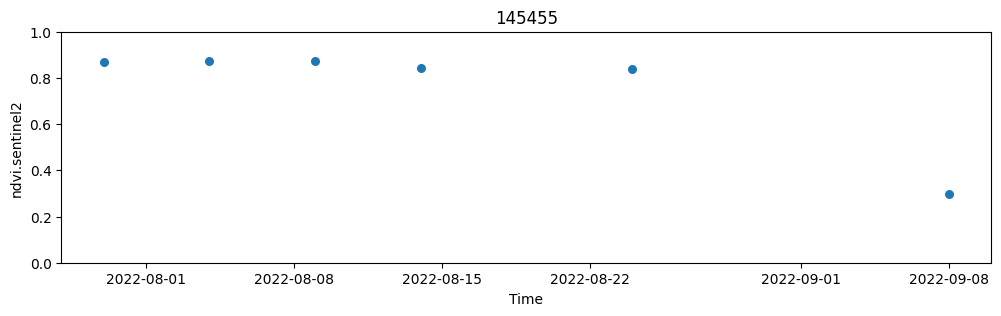

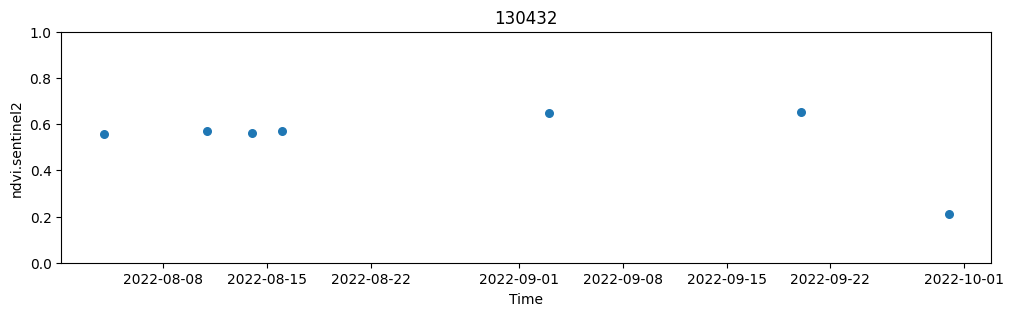

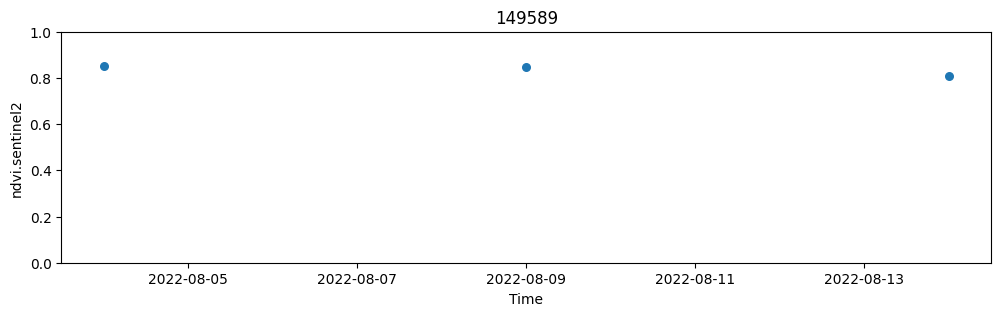

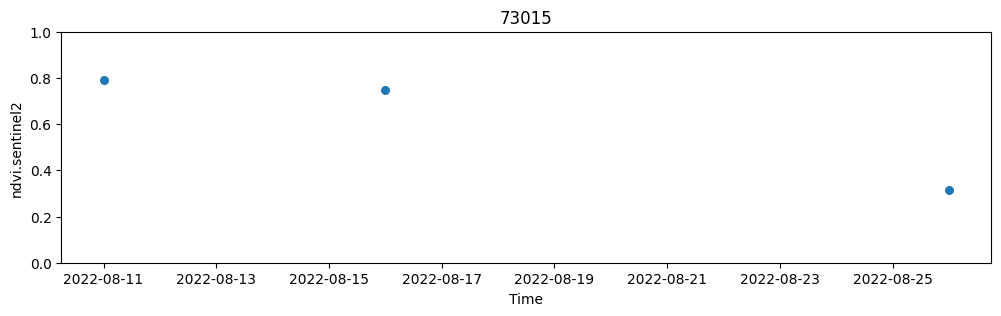

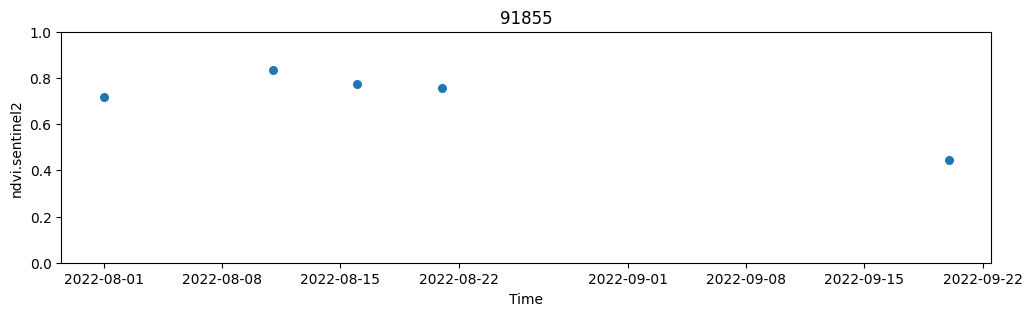

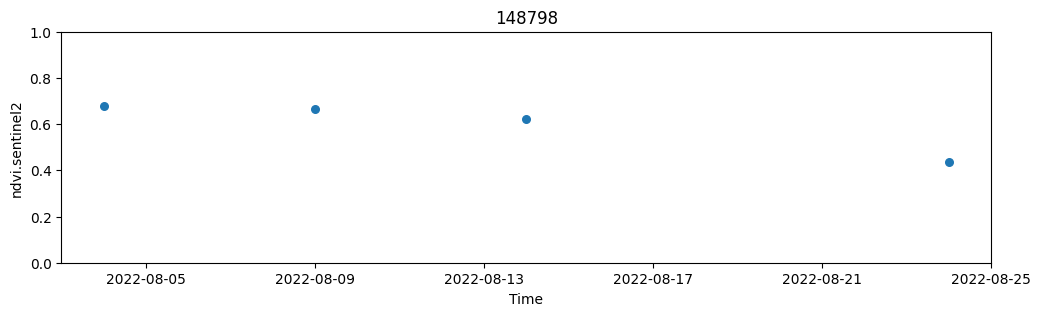

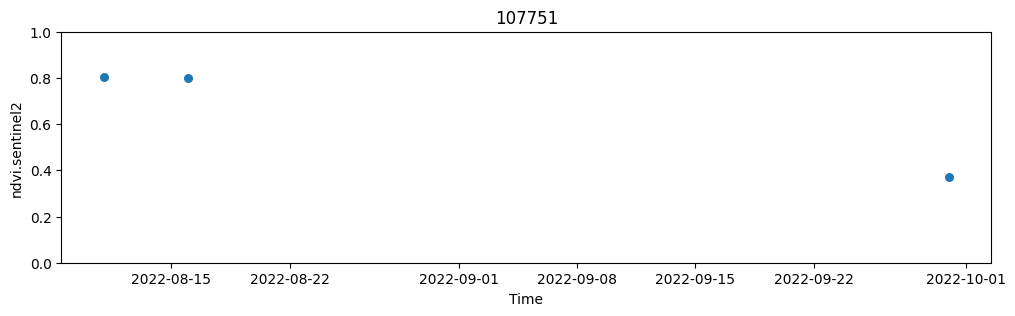

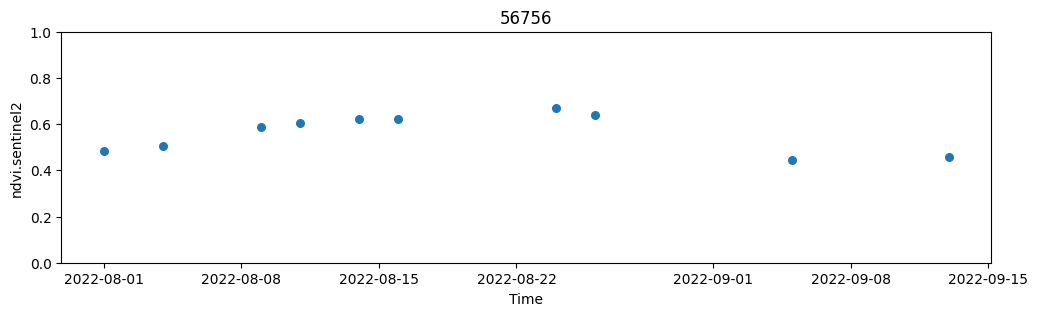

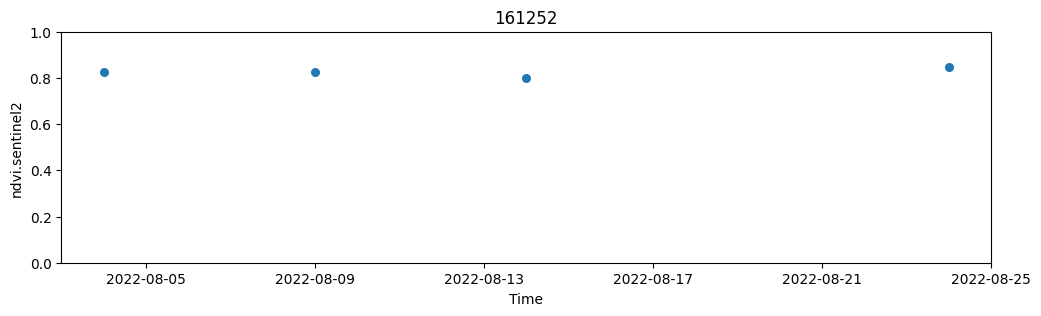

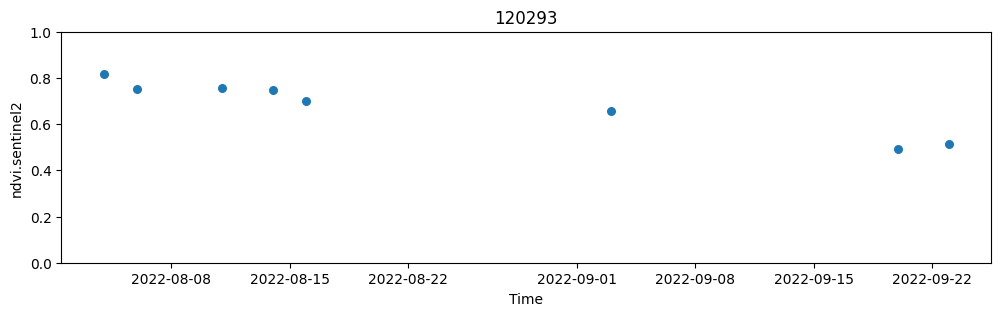

In [6]:
import random
for i in range(0,10):
    random_id = random.choice(ids)
    slice = df[df['location'] == random_id]
    slice = slice[slice['qa.sentinel2'] > 0.8]
    generic_plot(slice,s=30,title=random_id)